## 示例一：

## 1. 导入依赖包

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## 2. 导入数据集并对其进行归一化

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

## 3. 用函数式API进行模型搭建

In [3]:
inputs = keras.Input(shape=(784,))
dense = layers.Dense(64, activation='relu')
x = dense(inputs)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()
keras.utils.plot_model(model, 'model_info.png', show_shapes=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


## 4. 定义模型损失函数、优化器和评价指标

In [4]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=['acc']
)

## 5. 对模型进行训练

In [5]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 3s 2ms/step - loss: 0.3552 - acc: 0.8969 - val_loss: 0.1789 - val_acc: 0.9501
Epoch 2/5
750/750 [==============================] - 2s 2ms/step - loss: 0.1571 - acc: 0.9531 - val_loss: 0.1359 - val_acc: 0.9613
Epoch 3/5
750/750 [==============================] - 2s 2ms/step - loss: 0.1154 - acc: 0.9652 - val_loss: 0.1244 - val_acc: 0.9641
Epoch 4/5
750/750 [==============================] - 2s 2ms/step - loss: 0.0910 - acc: 0.9735 - val_loss: 0.1131 - val_acc: 0.9655
Epoch 5/5
750/750 [==============================] - 2s 2ms/step - loss: 0.0754 - acc: 0.9770 - val_loss: 0.1039 - val_acc: 0.9690


## 6. 用测试集测试模型准确率

In [6]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

313/313 - 0s - loss: 0.0920 - acc: 0.9727
Test loss: 0.09202481061220169
Test accuracy: 0.9726999998092651


## 7. 绘制模型的损失变化曲线和准确率变化曲线

In [7]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


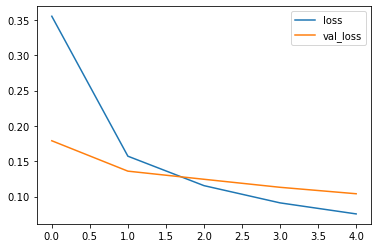

In [8]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()

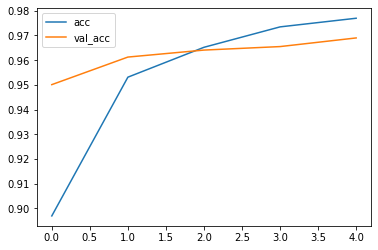

In [9]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()
plt.show()

## 示例二：

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

inputs = keras.Input(shape=(28, 28))
x = keras.layers.Flatten()(inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()
keras.utils.plot_model(model, 'model_info.png', show_shapes=True)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=['acc']
)

history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/downl

C:\Anaconda\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


750/750 [==============================] - 2s 2ms/step - loss: 0.3566 - acc: 0.8975 - val_loss: 0.1859 - val_acc: 0.9473
Epoch 2/5
750/750 [==============================] - 2s 2ms/step - loss: 0.1601 - acc: 0.9535 - val_loss: 0.1433 - val_acc: 0.9570
Epoch 3/5
750/750 [==============================] - 2s 2ms/step - loss: 0.1162 - acc: 0.9647 - val_loss: 0.1269 - val_acc: 0.9633
Epoch 4/5
750/750 [==============================] - 2s 2ms/step - loss: 0.0918 - acc: 0.9732 - val_loss: 0.1098 - val_acc: 0.9672
Epoch 5/5
750/750 [==============================] - 2s 2ms/step - loss: 0.0750 - acc: 0.9773 - val_loss: 0.1040 - val_acc: 0.9684
313/313 - 0s - loss: 0.0993 - acc: 0.9690
Test loss: 0.09925781935453415
Test accuracy: 0.968999981880188


In [11]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


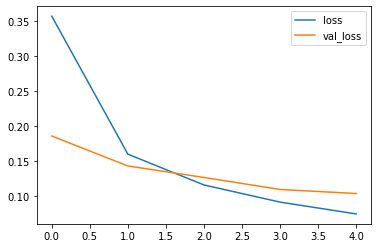

In [12]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()

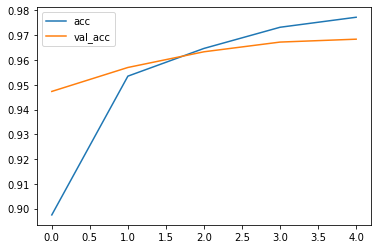

In [13]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()
plt.show()

## 示例三：

In [14]:
input1 = keras.Input(shape=(28, 28))
input2 = keras.Input(shape=(28, 28))

x1 = keras.layers.Flatten()(input1)
x2 = keras.layers.Flatten()(input2)

x = keras.layers.concatenate([x1, x2])
x = keras.layers.Dense(32, activation='relu')(x)
output = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=[input1, input2], outputs=output)
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 784)          0           input_3[0][0]                    
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 784)          0           input_4[0][0]                    
____________________________________________________________________________________________